# Aplicación de GMM para clustering -> Segmentación 

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from sklearn.mixture import GaussianMixture

%matplotlib inline

np.random.seed(42)

La siguiente imagen es un linfocito normal de la sangre periférica

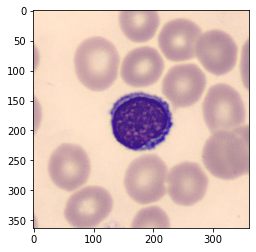

In [2]:
image = Image.open("linfo.jpg")
plt.imshow(image);

In [3]:
# Convierte la imagen a un array de numpy
im = np.asarray(image)
print(im.shape)

(363, 360, 3)


1. Utilice un modelo GMM para segmentar la imagen del linfocito en tres regiones. El resultado debe ser tres imágenes correspondientes a las probabilidades posteriores de las agrupaciones generadas con el modelo de GMM.

Sugerencia. Recuerde que cada pixel de la imagen está compuesta por tres valores R,G,B. Para convertir la imagen a un conjunto de datos de n filas x 3 columnas, utilice `np.reshape()` y de ahí podra usar el modelo GMM. Posteriormente, también deberar usar el reshape para volver cada columna de las probabilidades en una imagen de escala de grises con un tamaño de 363x360 (note que cada columna es solo es una matriz, porque es de escala de grises).

2. Varie el tipo de covarianza mediante el parámetro del model `covariance_type` y determine "visualmente" que tipo de covarianza funciona mejor para la segmentación.

3. Con el tipo de varianza escogida, mediante la métrica BIC o AIC (es un método del modelo) determine si es mejor tener 3 o 4 clusters. Compruebelo visualmente.

4. ¿Por qué el núcleo no se logra segmentar? ¿Cómo podría lograr segmentar el núcleo (de forma simple)? Compruebelo. 

5. Realice la segmentación para las imágenes de la carpeta `test_set`. Visualize las segmentaciónes (un sólo grid) y grafique la métrica de AIC o BIC (por ejm barras).

Nota: La segmentación que estamos realizando es no supervisada. Esto quiere decir, que para cada imagen se crea un modelo y se predicen las probabilidades posteriores de esa imagen. Es posible (y es fácil con sklearn) realizar un modelo no-supervisado a partir de los pesos y responsabilidades encontrados con una o varias imágenes y luego realizar la predicción con otras nuevas. Pero, en este ejercicio no lo estamos realizando así.

Nota 2: Es posible también obtener regiones segmentadas no suaves (usando `model.predict`). Sería interesante graficar dichas regiones con transparencia o bordes sobre las imágenes originales, para propósitos de visualización. Pero no es necesario para este ejercicio.

Nota 3: Es posible evaluar la segmentación de una forma más objetiva, determinando regiones no suaves, calculando una métrica de segmentación como el [índice Jaccard (o IOU)](https://en.wikipedia.org/wiki/Jaccard_index) y usando un ground truth (segmentaciones realizadas a mano).

# Punto 1

GaussianMixture(n_components=3)

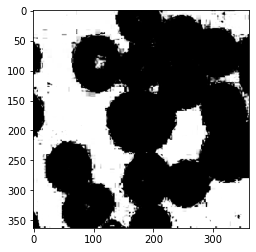

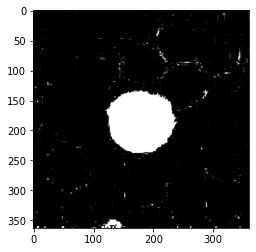

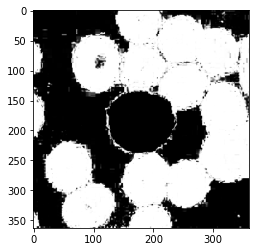

In [32]:
def gaussmix(im, ncomp, covtype):
    im_new = im.reshape(363*360, 3)
    gmm_model = GaussianMixture(n_components=ncomp, covariance_type = covtype)
    gmm_model.fit(im_new)
    
    prob = gmm_model.predict_proba(im_new)
    pd.DataFrame(prob)

    im1 = prob[:,0].reshape(363,360)
    im2 = prob[:,1].reshape(363,360)
    im3 = prob[:,2].reshape(363,360)
    
    plt.figure(1)
    plt.imshow(im1, cmap = 'gray');
    plt.figure(2)
    plt.imshow(im2, cmap = 'gray');
    plt.figure(3)
    plt.imshow(im3, cmap = 'gray');
    return gmm_model

gaussmix(im, 3, 'full')

# Punto 2

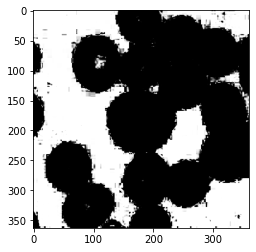

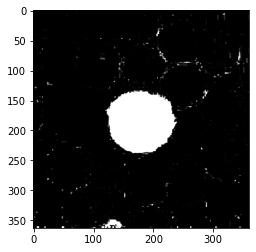

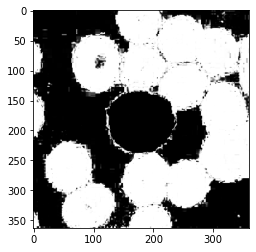

In [25]:
gmm_model = gaussmix(im, 3, 'full')

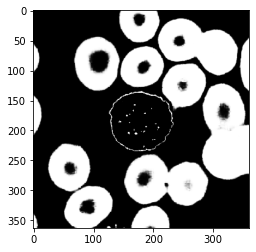

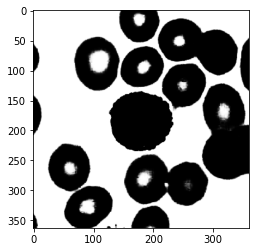

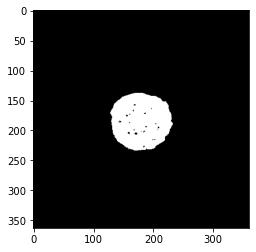

In [26]:
gmm_model = gaussmix(im, 3, 'tied')

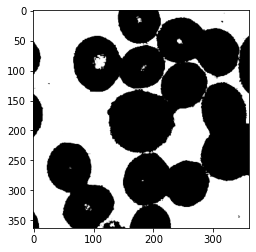

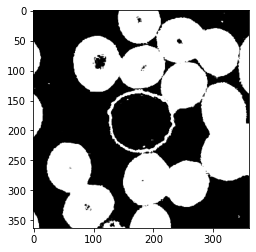

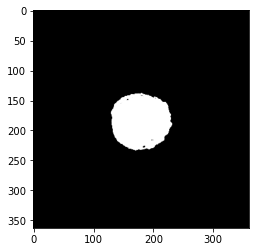

In [27]:
gmm_model = gaussmix(im, 3, 'diag')

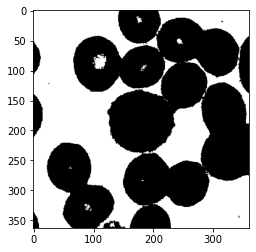

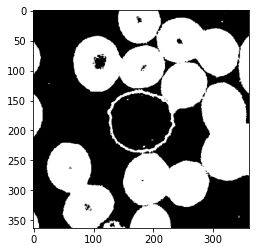

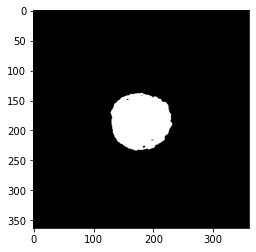

In [28]:
gmm_model = gaussmix(im, 3, 'spherical')

Parece que 'tied' es el $\texttt{covariance_type}$ adecuado, observe que podemos ver la diferenciación de los núcleos de las células en escala de grises.

# Punto 3

2736538.203780022

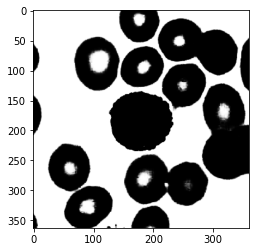

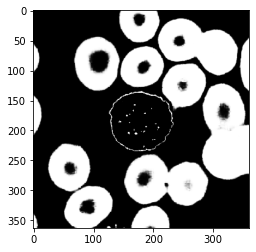

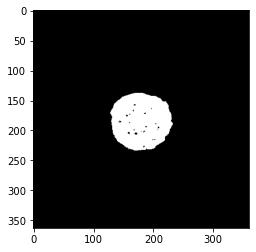

In [29]:
im_new = im.reshape(363*360, 3)
gmm_model = gaussmix(im, 3, 'tied')
gmm_model.bic(im_new)

2733669.1262492114

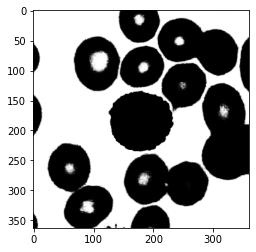

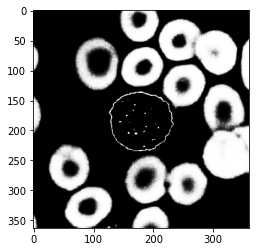

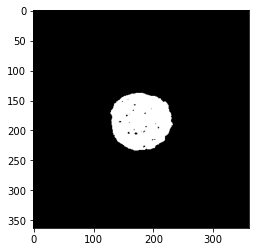

In [38]:
im_new = im.reshape(363*360, 3)
gmm_model = gaussmix(im, 4, 'tied')
gmm_model.bic(im_new)

Según BIC, el modelo preferido sería el de 4 componentes, pues la métrica es menor que con 3. Observe visualmente que los núcleos son más detallados con 4 componentes.

# Punto 4

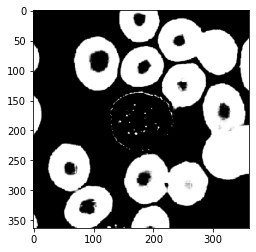

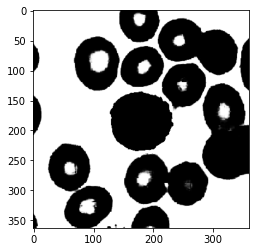

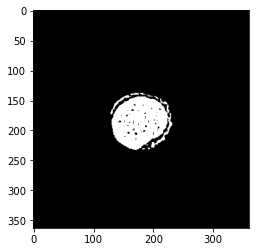

In [44]:
    im_new = im.reshape(363*360, 3)
    gmm_model = GaussianMixture(n_components=4, covariance_type = 'tied', init_params='kmeans',n_init=50)
    gmm_model.fit(im_new)
    
    prob = gmm_model.predict_proba(im_new)
    pd.DataFrame(prob)

    im1 = prob[:,0].reshape(363,360)
    im2 = prob[:,1].reshape(363,360)
    im3 = prob[:,2].reshape(363,360)
    
    plt.figure(1)
    plt.imshow(im1, cmap = 'gray');
    plt.figure(2)
    plt.imshow(im2, cmap = 'gray');
    plt.figure(3)
    plt.imshow(im3, cmap = 'gray');

Por defecto solo se hace una inicialización. Al poner 50 inicializaciones, se conserva la que produce mejores resultados, y por tanto en la imagen final obtenemos la segmentación del núcleo.

# Punto 5

In [98]:
data_test = ['data_test/LYMPHOCYTE_993071.jpg', 'data_test/LYMPHOCYTE_993900.jpg', 'data_test/LYMPHOCYTE_994809.jpg', 'data_test/LYMPHOCYTE_995059.jpg', 'data_test/LYMPHOCYTE_996004.jpg', 'data_test/LYMPHOCYTE_996920.jpg', 'data_test/LYMPHOCYTE_997617.jpg', 'data_test/LYMPHOCYTE_999916.jpg', 'data_test/LYMPHOCYTE_14069398.jpg', 'data_test/LYMPHOCYTE_14120881.jpg', 'data_test/SEGMENTED_979352.jpg', 'data_test/SEGMENTED_982697.jpg', 'data_test/SEGMENTED_988734.jpg', 'data_test/SEGMENTED_991402.jpg', 'data_test/SEGMENTED_993810.jpg']

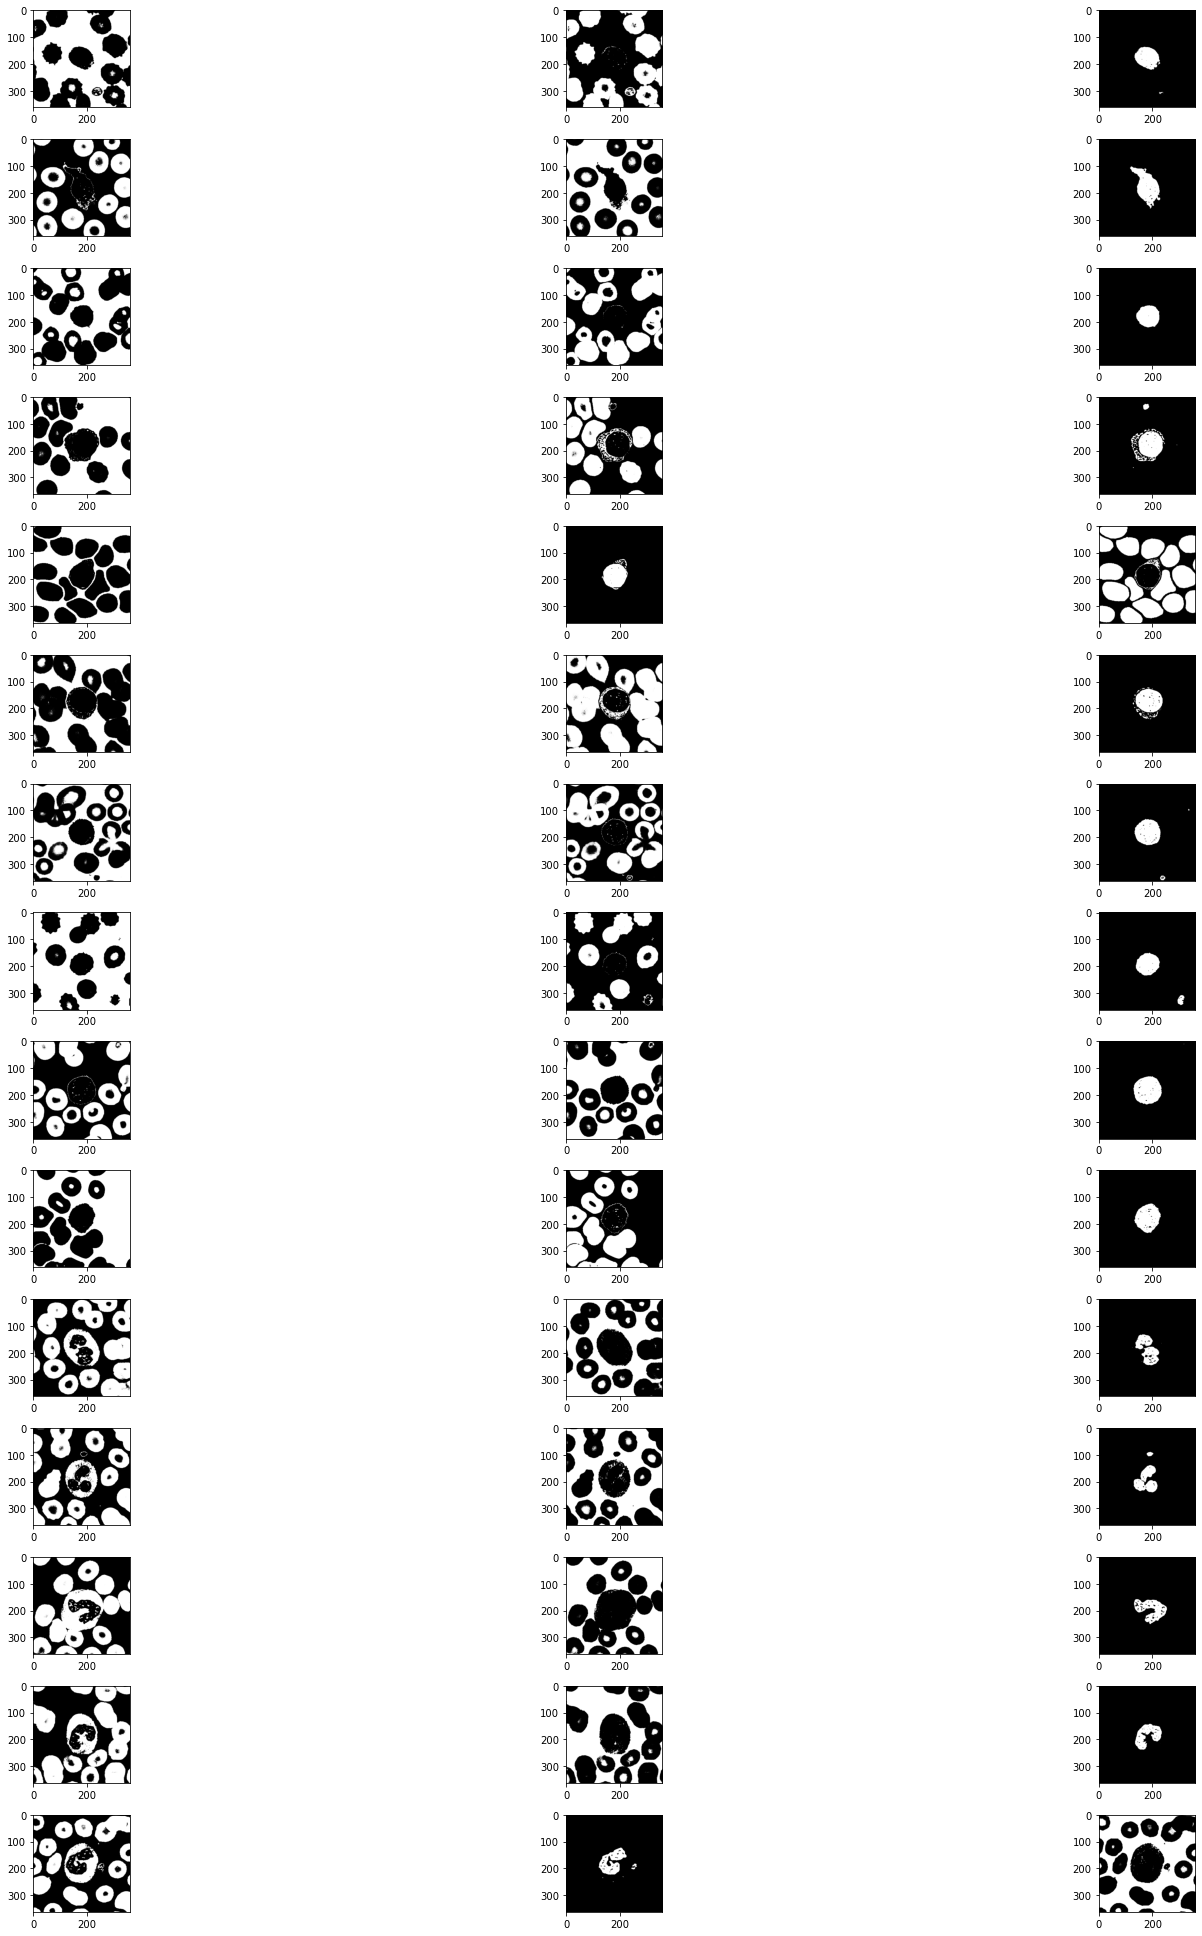

In [99]:
fig, axs = plt.subplots(nrows=15, ncols=3, figsize=(27, 27))

bic_coef = []
imgs = []
for ax, data in zip(axs.flat, data_test):
    image = Image.open(data)
    im = np.asarray(image)
    im_new = im.reshape(363*360, 3)
    gmm_model = GaussianMixture(n_components=3, covariance_type = 'tied')
    gmm_model.fit(im_new)
    
    prob = gmm_model.predict_proba(im_new)
    pd.DataFrame(prob)
    
    imgs.append(prob[:,0].reshape(363,360))
    imgs.append(prob[:,1].reshape(363,360))
    imgs.append(prob[:,2].reshape(363,360))
    
    bic_coef.append(gmm_model.bic(im_new))
    
    for ax, imi in zip(axs.flat, imgs):
    
        ax.imshow(imi, cmap = 'gray');
    
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Scores')

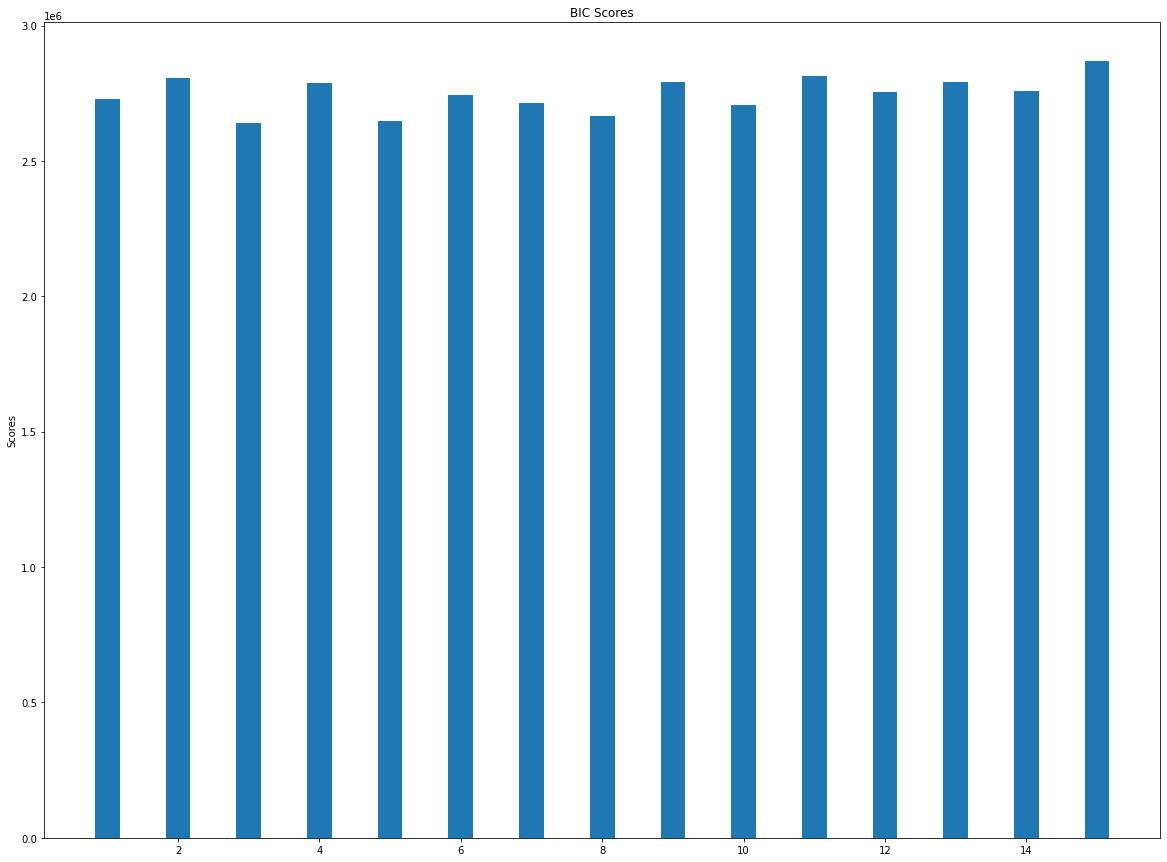

In [112]:
plt.figure(figsize=(20,15))
plt.title('BIC Scores')
plt.bar((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15), tuple(bic_coef), width = 0.35)
plt.ylabel('Scores')